# Case Study: UK used BMW car price analysis and prediction

You are provided with a dataset containing information about used BMW cars, including their specifications and selling prices. The dataset contains information of price, transmission, mileage, fuel type, road tax, miles per gallon (mpg), and engine size. It is cool to have some insignts for the data by applying your learnt visualisation and modelling techniques, and see if we could determine what is the ideal price to sell your used BMW car (assuming you have one...) based on the known information. 

This notebook provides you a skeleton of analysis and modelling, but you should decide what information should be digged out and how the identified information could help you to setup a regression model to make an accuracy prediction for the selling price of your BMW car! At the end of this case study, you will be given another test set and you may find out how well your built model would perform. This is important, becuase that will determine if you could sell your car at a fair price!!

## 0. Import libraries

What Python libraries you will need? Import them for later usage.

In [113]:
# Importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

## 1. Load and check the dataset

#### Hint - Try to answer the following questions:

1. How to load the dataset using pandas?
2. What columns should be features? What column should be predicting target?
3. How can you have a basic understanding for the given dataset?

In [114]:
# Load the dataset named "bmw_training_data.csv" in the dataset folder.
dataset = pd.read_csv("./datasets/bmw_training_data.csv")

# What variables we have?
print(dataset.columns)

Index(['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',
       'engineSize', 'price'],
      dtype='object')


In [115]:
dataset.shape

(8624, 9)

In [116]:
# Split the dataset into features and target variable
target = dataset['price']
features = dataset.drop('price', axis=1)

In [117]:
## Perform some basic data viewing and checking steps to have a preliminary understanding of the dataset.

# What does the dataset look like?
dataset.head(10)

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,5 Series,2019.0,Semi-Auto,9165.0,Petrol,145.0,50.4,2.0,23990
1,X5,2019.0,Automatic,6650.0,Diesel,145.0,37.7,3.0,46756
2,5 Series,2016.0,Automatic,64231.0,Diesel,145.0,53.3,3.0,14999
3,i8,2019.0,Automatic,2799.0,NaN,135.0,141.2,1.5,64750
4,X5,2013.0,Automatic,63583.0,Diesel,200.0,45.6,3.0,20140
5,5 Series,2014.0,Semi-Auto,35822.0,Diesel,165.0,NaN,3.0,15498
6,3 Series,2016.0,Automatic,52000.0,Diesel,30.0,64.2,2.0,14500
7,1 Series,2019.0,Manual,10.0,Petrol,145.0,44.1,1.5,22490
8,2 Series,2016.0,Manual,18840.0,Petrol,125.0,52.3,1.5,12306
9,X5,2017.0,NaN,11197.0,Diesel,NaN,47.1,NaN,35995


In [118]:
# Descriptive statistics of the dataset
print(features.describe())

              year        mileage          tax          mpg   engineSize
count  8202.000000    7422.000000  7083.000000  7415.000000  7807.000000
mean   2017.124848   25617.225276   131.584075    56.400108     2.159703
std       2.700697   25222.097792    60.584297    30.490955     0.549553
min    1996.000000       4.000000     0.000000     5.500000     0.000000
25%    2016.000000    5499.250000   135.000000    45.600000     2.000000
50%    2017.000000   18648.000000   145.000000    53.300000     2.000000
75%    2019.000000   38520.250000   145.000000    62.800000     2.000000
max    2048.000000  214000.000000   580.000000   470.800000     6.600000


In [119]:
# Unique values for each column?
for col in features.columns:
    print("{}: {}".format(col, features[col].unique()))

model: [' 5 Series' ' X5' ' i8' ' 3 Series' ' 1 Series' ' 2 Series' ' X6'
 ' 4 Series' ' X3' ' X2' ' Z4' ' X1' ' M4' ' i3' ' M3' ' M2' ' X4'
 ' 7 Series' ' M5' ' 6 Series' ' X7' ' 8 Series' ' M6' ' Z3']
year: [2019. 2016. 2013. 2014. 2017. 2018. 2015. 2020.   nan 2012. 2010. 2000.
 2007. 2009. 2006. 2011. 2008. 2002. 2031. 2040. 1996. 2042. 2001. 2004.
 2029. 2003. 1998. 2037. 2034. 1997. 2048. 2043. 2005. 1999. 2041. 2046.
 2045. 2032.]
transmission: ['Semi-Auto' 'Automatic' 'Manual' nan]
mileage: [ 9165.  6650. 64231. ... 40456.  5652. 17237.]
fuelType: ['Petrol' 'Diesel' nan 'Hybrid' 'Other' 'Electric']
tax: [145. 135. 200. 165.  30. 125.  nan 150. 160. 305. 300.  20. 205. 260.
   0. 265. 330. 235. 325. 140. 570. 195. 270. 565. 120. 240. 155. 555.
 255. 580. 250. 110. 315. 190. 185. 245.]
mpg: [ 50.4  37.7  53.3 141.2  45.6   nan  64.2  44.1  52.3  47.1  34.9  62.8
  37.2  65.7  56.5  41.5  42.8  48.7  36.7  38.7  60.1  34.   39.8  58.9
  35.3  57.6  54.3  42.2  51.4  61.4  74.3  68

## 2. preprocess the dataset

#### Hint - Try to answer the following questions:

1. Are there outliers missing values? 
2. How will you identify them and clean the dataset?

In [120]:
# Outliers in the "year" column
outliers = features['year'].loc[features['year'] > 2024]
outliers

382     2031.0
398     2040.0
917     2042.0
1849    2029.0
1985    2037.0
2215    2034.0
2969    2048.0
3163    2042.0
3221    2043.0
3634    2037.0
3859    2034.0
3899    2041.0
3990    2046.0
4202    2045.0
4284    2045.0
4706    2040.0
4836    2041.0
5538    2048.0
6839    2041.0
6909    2034.0
7087    2045.0
7566    2032.0
7826    2041.0
7960    2043.0
8222    2043.0
Name: year, dtype: float64

In [121]:
# Cap the outliers with the maximum value of the year
features['year'] = features['year'].apply(lambda x: 2019 if x > 2024 else x)

In [122]:
# Check null values
print(features.isnull().sum())

model              0
year             422
transmission     172
mileage         1202
fuelType         816
tax             1541
mpg             1209
engineSize       817
dtype: int64


In [123]:
## Fill the missing values

# For column "year" and "tax", we can fill the missing values with the mean value of the column
features['year'] = features['year'].fillna(np.round(features['year'].mean()))
features['tax'] = features['tax'].fillna(features['tax'].mean())
# For columns "mgp", "mileage" and "engineSize" , we can fill the missing values using "nearest" interpolation method
features['mpg'] = features['mpg'].interpolate(method='nearest')
features['engineSize'] = features['engineSize'].interpolate(method='nearest')
features['mileage'] = features['mileage'].interpolate(method='nearest')
# For columns "Transmission" and "fuelType" , we can fill the missing values with the most frequent value of the column
features['transmission'] = features['transmission'].fillna(features['transmission'].mode()[0])
features['fuelType'] = features['fuelType'].fillna(features['fuelType'].mode()[0])


In [124]:
# Check null values again
print(features.isnull().sum())

model           0
year            0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64


In [125]:
# Transform the "year" into integer type
features['year'] = features['year'].astype(int)

## 3. Data Visualistaion

#### Hint - Try to answer the following questions:

1. What visualisation tools you want to use?
2. How can these visualisation help you to understand the data?
3. How can your findings inspire the later modelling?

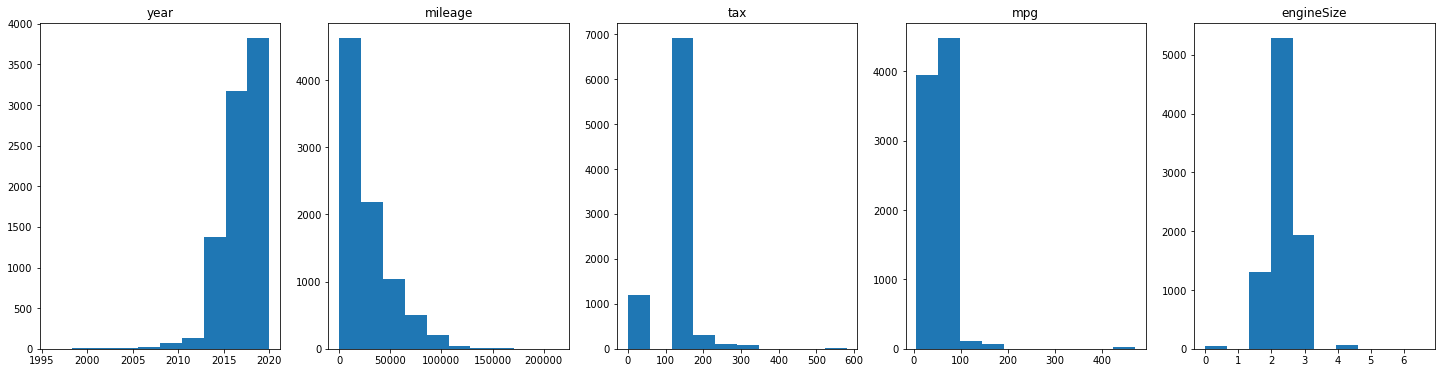

In [126]:
# Visualisation for numerical features
numerical_features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
# Plotting the distribution of numerical features
fig, axes = plt.subplots(1, 5, figsize=(25, 6))
for feature in numerical_features:
    axes[numerical_features.index(feature)].hist(features[feature])
    axes[numerical_features.index(feature)].set_title(feature)
plt.show()

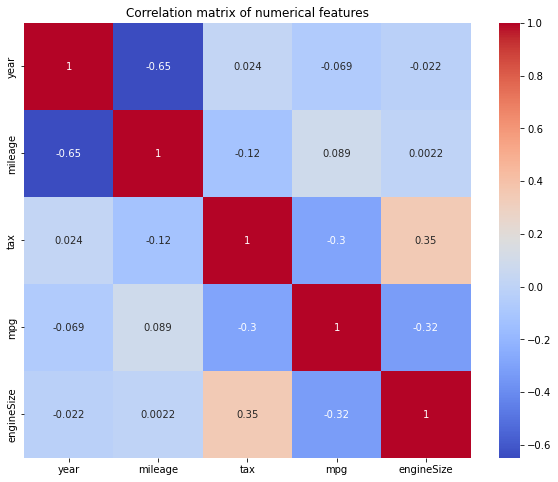

In [127]:
# Correlation matrix for numerical features
correlation_matrix = features.loc[:, numerical_features].corr()
# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation matrix of numerical features")
plt.show()

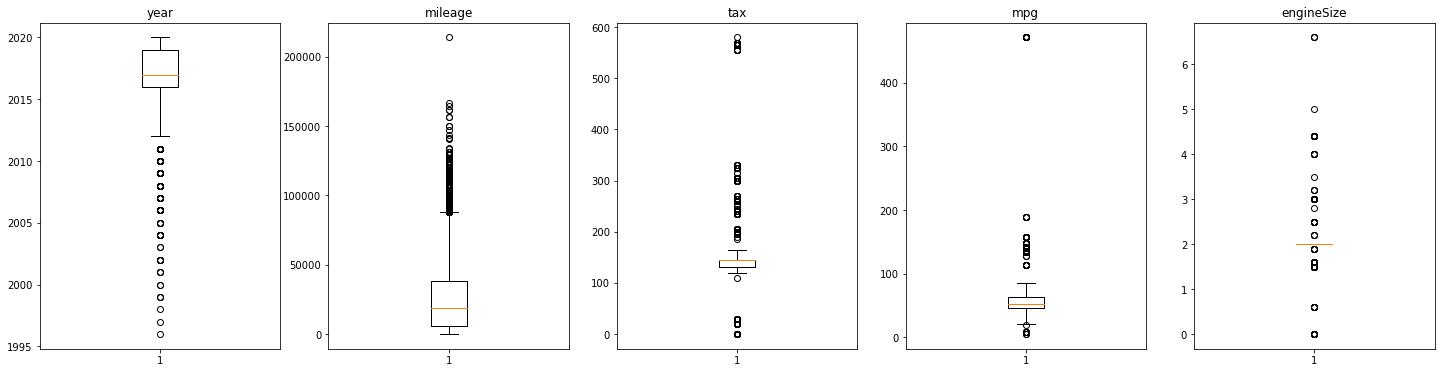

In [128]:
# boxplot for numerical features
fig, axes = plt.subplots(1, 5, figsize=(25, 6))
for feature in numerical_features:
    axes[numerical_features.index(feature)].boxplot(features[feature])
    axes[numerical_features.index(feature)].set_title(feature)
plt.show()
    

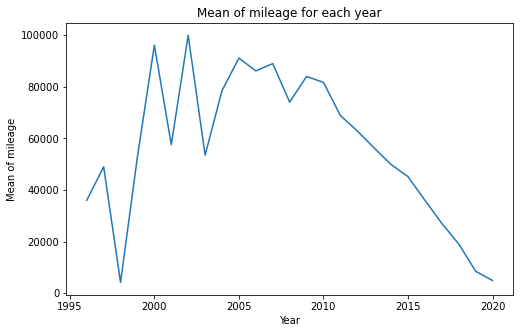

In [129]:
# Find the mean of mileage for each year
mileage_mean = features.groupby('year')['mileage'].mean()
# plot a line chart
plt.figure(figsize=(8, 5))
plt.plot(mileage_mean)
plt.title("Mean of mileage for each year")
plt.xlabel("Year")
plt.ylabel("Mean of mileage")
plt.show()

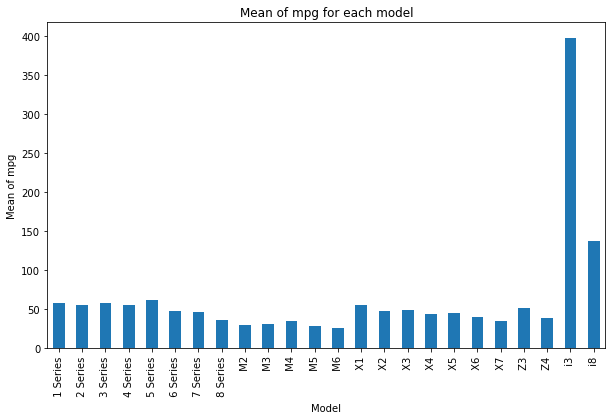

In [131]:
# Find the mean mpg for each model
mpg_mean = features.groupby('model')['mpg'].mean()
# plot a bar chart
plt.figure(figsize=(10, 6))
mpg_mean.plot(kind='bar')
plt.title("Mean of mpg for each model")
plt.xlabel("Model")
plt.ylabel("Mean of mpg")
plt.show()

## 4. Modelling

In [132]:
# Transform categorical variables into numerical variables using One-hot-encoding (dummy variables)
features = pd.get_dummies(features, columns=['model', 'transmission', 'fuelType'], drop_first=False)